In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from matplotlib import colors

Matplotlib created a temporary config/cache directory at /tmp/tmp.TvFaSlRn87/matplotlib-_u8tezto because the default path (/home/aevans/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
def load_nysm_data(year):
    # these parquet files are created by running "get_resampled_nysm_data.ipynb"
    nysm_path = "/home/lgaudet/AI2ES/Processed_Data/NYSM/"

    nysm_1H_obs = pd.read_parquet(f"{nysm_path}nysm_1H_obs_{year}.parquet")
    nysm_3H_obs = pd.read_parquet(f"{nysm_path}nysm_3H_obs_{year}.parquet")
    return nysm_1H_obs, nysm_3H_obs

In [ ]:
init = "00"

GFS = pd.read_pickle(
    f"../Processed_Data/ML/GFS_fcast_error_metrics_{init}z_2018-2021_mask_water.pkl"
)
NAM = pd.read_pickle(
    f"../Processed_Data/ML/NAM_fcast_error_metrics_{init}z_2018-2021_mask_water.pkl"
)
HRRR = pd.read_pickle(
    f"../Processed_Data/ML/HRRR_fcast_error_metrics_{init}z_2018-2021_mask_water.pkl"
)

In [ ]:
nysm_1H_obs, nysm_3H_obs = load_nysm_data("2019")

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3724: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  return self[key]


Text(0.5, 1.0, 'Voorheesville, NY')

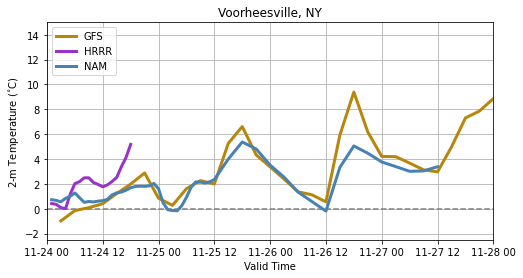

In [ ]:
with_obs = False

var = "t2m"

nysm_obs_1H = nysm_1H_obs.loc["VOOR", "2019-11"]["tair"]
nysm_obs_3H = nysm_3H_obs.loc["VOOR", "2019-11"]["tair"]

gfs_fcast = GFS.loc["VOOR", "2019-11-24"][f"{var}_GFS"]
hrrr_fcast = HRRR.loc["VOOR", "2019-11-24"][f"{var}_HRRR"]
nam_fcast = NAM.loc["VOOR", "2019-11-24"][f"{var}_NAM"]

plt.figure(figsize=(8, 4))
plt.plot(
    gfs_fcast.index, gfs_fcast.values, label="GFS", color="darkgoldenrod", linewidth=3
)
plt.plot(
    hrrr_fcast.index, hrrr_fcast.values, label="HRRR", color="darkorchid", linewidth=3
)
plt.plot(nam_fcast.index, nam_fcast.values, label="NAM", color="steelblue", linewidth=3)
if with_obs:
    plt.plot(
        nysm_obs_1H.index,
        nysm_obs_1H.values,
        label="NYSM",
        color="k",
        linewidth=2,
        linestyle=":",
    )
plt.hlines(0, "2019-11-24", "2019-11-28", linestyle="--", color="grey")
plt.legend(loc="upper left")
plt.grid(True)
plt.xlim(["2019-11-24", "2019-11-28"])
plt.ylim([-2.5, 15])
plt.xlabel("Valid Time")
plt.ylabel("2-m Temperature ($^{\circ}$C)")
plt.title("Voorheesville, NY")
# if with_obs:
#     plt.savefig(f'../Figures/temp_forecast_and_obs_VOOR_tseries.png', dpi=200)
# else:
#     plt.savefig(f'../Figures/temp_forecast_VOOR_tseries.png', dpi=200)

Text(0.5, 0, 'Valid Time')

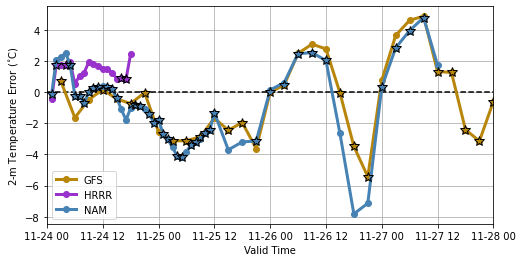

In [ ]:
gfs_ferror = GFS.loc["VOOR", "2019-11-24"]["t2m_error"]
hrrr_ferror = HRRR.loc["VOOR", "2019-11-24"]["t2m_error"]
nam_ferror = NAM.loc["VOOR", "2019-11-24"]["t2m_error"]

# find the forecast error values closest to 0
df_errors = pd.concat([gfs_ferror, hrrr_ferror, nam_ferror], axis=1)
df_errors.columns = ["GFS", "HRRR", "NAM"]
df_errors["min"] = df_errors.abs().min(axis=1)

closest_to_zero = df_errors[
    df_errors[["GFS", "HRRR", "NAM"]].abs().isin(df_errors["min"])
][["GFS", "HRRR", "NAM"]].min(axis=1)

plt.figure(figsize=(8, 4))
plt.plot(
    gfs_ferror.index,
    gfs_ferror.values,
    label="GFS",
    marker="o",
    color="darkgoldenrod",
    linewidth=3,
)
plt.plot(
    hrrr_ferror.index,
    hrrr_ferror.values,
    label="HRRR",
    marker="o",
    color="darkorchid",
    linewidth=3,
)
plt.plot(
    nam_ferror.index,
    nam_ferror.values,
    label="NAM",
    marker="o",
    color="steelblue",
    linewidth=3,
)
plt.plot(
    closest_to_zero.index,
    closest_to_zero.values,
    linestyle="None",
    marker="*",
    mfc="None",
    mec="k",
    markersize=10,
)
plt.hlines(0, "2019-11-24", "2019-11-28", colors="k", linestyles="--")
plt.legend()
plt.xlim(["2019-11-24", "2019-11-28"])
plt.grid(True)
plt.ylabel("2-m Temperature Error ($^{\circ}$C)")
plt.xlabel("Valid Time")
# plt.savefig(f'../Figures/temp_error_tseries.png', dpi=200)

Text(0.5, 0, 'Valid Time')

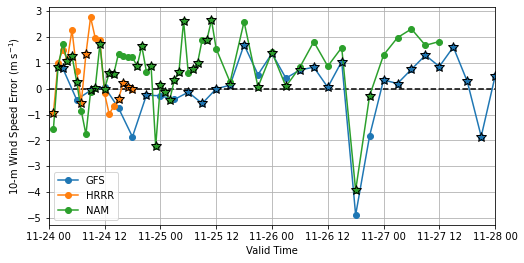

In [ ]:
gfs_ferror = GFS.loc["VOOR", "2019-11-24"]["u_total_error"]
hrrr_ferror = HRRR.loc["VOOR", "2019-11-24"]["u_total_error"]
nam_ferror = NAM.loc["VOOR", "2019-11-24"]["u_total_error"]

# find the forecast error values closest to 0
df_errors = pd.concat([gfs_ferror, hrrr_ferror, nam_ferror], axis=1)
df_errors.columns = ["GFS", "HRRR", "NAM"]
df_errors["min"] = df_errors.abs().min(axis=1)

closest_to_zero = df_errors[
    df_errors[["GFS", "HRRR", "NAM"]].abs().isin(df_errors["min"])
][["GFS", "HRRR", "NAM"]].min(axis=1)

plt.figure(figsize=(8, 4))
plt.plot(gfs_ferror.index, gfs_ferror.values, label="GFS", marker="o")
plt.plot(hrrr_ferror.index, hrrr_ferror.values, label="HRRR", marker="o")
plt.plot(nam_ferror.index, nam_ferror.values, label="NAM", marker="o")
plt.plot(
    closest_to_zero.index,
    closest_to_zero.values,
    linestyle="None",
    marker="*",
    mfc="None",
    mec="k",
    markersize=10,
)
plt.hlines(0, "2019-11-24", "2019-11-28", colors="k", linestyles="--")
plt.legend()
plt.xlim(["2019-11-24", "2019-11-28"])
plt.grid(True)
plt.ylabel("10-m Wind Speed Error (m s$^{-1}$)")
plt.xlabel("Valid Time")
# plt.savefig(f'../Figures/wind_speed_error_tseries.png', dpi=200)

In [ ]:
HRRR = HRRR.reset_index()
HRRR["month"] = HRRR["time"].dt.month
HRRR = HRRR.set_index(["station", "time", "valid_time"])

GFS = GFS.reset_index()
GFS["month"] = GFS["time"].dt.month
GFS = GFS.set_index(["station", "time", "valid_time"])

NAM = NAM.reset_index()
NAM["month"] = NAM["time"].dt.month
NAM = NAM.set_index(["station", "time", "valid_time"])

<AxesSubplot:xlabel='t2m_HRRR', ylabel='Density'>

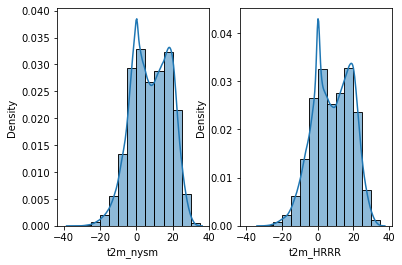

In [ ]:
bins = np.arange(-40, 40, 5)
plt.figure()
plt.subplot(121)
sns.histplot(HRRR, x="t2m_nysm", stat="density", bins=bins, kde=True)
plt.subplot(122)
sns.histplot(HRRR, x="t2m_HRRR", stat="density", bins=bins, kde=True)

In [ ]:
def get_clim_div_rmse(df, var, model_name):
    rmse_df = (
        df.reset_index()
        .groupby([df.reset_index().time.dt.month, "climate_division_name"])[
            [f"{var}_rmse"]
        ]
        .mean()
        .rename(columns={f"{var}_rmse": f"{var}_rmse_{model_name}"})
    )
    return rmse_df


def get_min_model(var, all_models, GFS, NAM, HRRR=None):
    rmse_GFS = get_clim_div_rmse(GFS, var, "GFS")
    rmse_NAM = get_clim_div_rmse(NAM, var, "NAM")
    models = [rmse_GFS, rmse_NAM]
    if all_models:
        rmse_HRRR = get_clim_div_rmse(HRRR, var, "HRRR")
        models.append(rmse_HRRR)

    rmse_all = pd.concat(models, axis=1)
    rmse_all["min_model"] = rmse_all.idxmin(axis=1)
    rmse_all["min val"] = rmse_all.min(axis=1)

    rmse_all["min_model"] = rmse_all["min_model"].replace(f"{var}_rmse_", "")
    rmse_all["min_model"] = rmse_all["min_model"].map(lambda x: x.split("_")[-1])

    mapping_dict = {"HRRR": 1, "NAM": 2, "GFS": 3}
    rmse_all["mapped_vals"] = rmse_all["min_model"].map(mapping_dict)

    rmse_all_unstack = rmse_all.unstack()
    return rmse_all_unstack

In [ ]:
HRRR_18 = HRRR[HRRR["lead_time_ONLY_HOURS"] <= 18]
GFS_18 = GFS[GFS["lead_time_ONLY_HOURS"] <= 18]
NAM_18 = NAM[NAM["lead_time_ONLY_HOURS"] <= 18]

GFS_84 = GFS[(GFS["lead_time_ONLY_HOURS"] > 18) & (GFS["lead_time_ONLY_HOURS"] <= 84)]
NAM_84 = NAM[(NAM["lead_time_ONLY_HOURS"] > 18) & (NAM["lead_time_ONLY_HOURS"] <= 84)]

In [ ]:
rmse_all_unstack_t2m_18 = get_min_model("t2m", True, GFS_18, NAM_18, HRRR_18)
rmse_all_unstack_d2m_18 = get_min_model("d2m", True, GFS_18, NAM_18, HRRR_18)
rmse_all_unstack_u_total_18 = get_min_model("u_total", True, GFS_18, NAM_18, HRRR_18)

In [ ]:
rmse_all_unstack_t2m_84 = get_min_model("t2m", False, GFS_84, NAM_84)
rmse_all_unstack_d2m_84 = get_min_model("d2m", False, GFS_84, NAM_84)
rmse_all_unstack_u_total_84 = get_min_model("u_total", False, GFS_84, NAM_84)

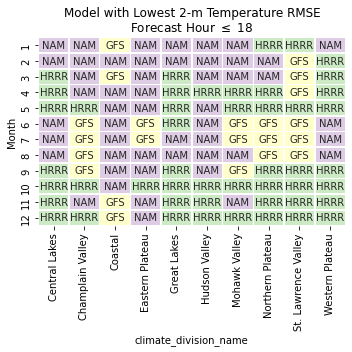

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_t2m_18["mapped_vals"],
    annot=rmse_all_unstack_t2m_18["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title("Model with Lowest 2-m Temperature RMSE\nForecast Hour $\leq$ 18")
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_t2m_fh18.png', dpi=200, facecolor='white', transparent=False)

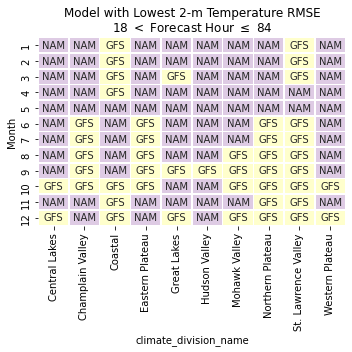

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_t2m_84["mapped_vals"],
    annot=rmse_all_unstack_t2m_84["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title("Model with Lowest 2-m Temperature RMSE\n18 $<$ Forecast Hour $\leq$ 84")
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_t2m_fh84.png', dpi=200, facecolor='white', transparent=False)

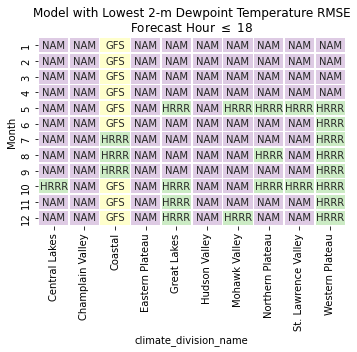

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_d2m_18["mapped_vals"],
    annot=rmse_all_unstack_d2m_18["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title(
    f"Model with Lowest 2-m Dewpoint Temperature RMSE\nForecast Hour $\leq$ 18"
)
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_d2m_fh18.png', dpi=200, facecolor='white', transparent=False)

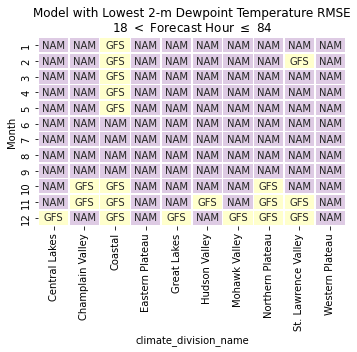

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_d2m_84["mapped_vals"],
    annot=rmse_all_unstack_d2m_84["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title(
    "Model with Lowest 2-m Dewpoint Temperature RMSE\n18 $<$ Forecast Hour $\leq$ 84"
)
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_d2m_fh84.png', dpi=200, facecolor='white', transparent=False)

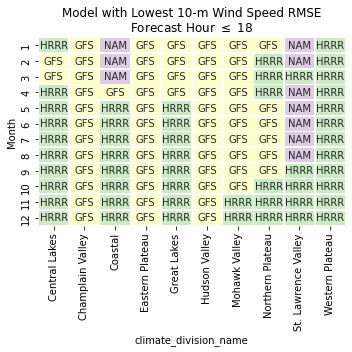

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_u_total_18["mapped_vals"],
    annot=rmse_all_unstack_u_total_18["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title("Model with Lowest 10-m Wind Speed RMSE\nForecast Hour $\leq$ 18")
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_utotal_fh18.png', dpi=200, facecolor='white', transparent=False)

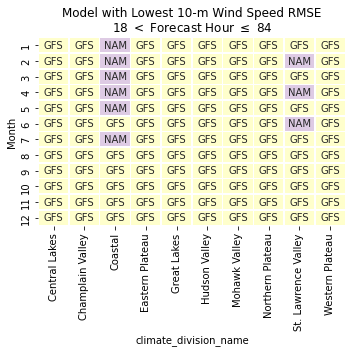

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(
    rmse_all_unstack_u_total_84["mapped_vals"],
    annot=rmse_all_unstack_u_total_84["min_model"],
    fmt="",
    linewidths=0.5,
    cmap=cm.Pastel1,
    vmin=-1,
    vmax=6,
    cbar=False,
)
ax.set_ylabel("Month")
ax.set_title("Model with Lowest 10-m Wind Speed RMSE\n18 $<$ Forecast Hour $\leq$ 84")
plt.tight_layout()
# plt.savefig('../Figures/model_with_lowest_utotal_fh84.png', dpi=200, facecolor='white', transparent=False)